In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/Admission_Predict.csv')
data.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
279,280,304,102,2,3.0,4.0,8.73,0,0
256,257,309,99,3,4.0,4.0,8.56,0,1
319,320,327,113,4,3.5,3.0,8.69,1,1
76,77,327,112,3,3.0,3.0,8.72,1,0
109,110,304,103,5,5.0,4.0,8.64,0,0


In [3]:
data.drop(columns='Serial No.', axis=1, inplace=True)
data.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
398,312,103,3,3.5,4.0,8.78,0,0
361,334,116,4,4.0,3.5,9.54,1,1
377,290,100,1,1.5,2.0,7.56,0,0
16,317,107,3,4.0,3.0,8.70,0,0
224,305,105,2,3.0,2.0,8.23,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 25.1 KB


### Treating the Categorical data and Scaling the data

In [5]:
df_dv = data['Chance of Admit']
df_iv = data.drop(columns='Chance of Admit', axis=1)

In [6]:
df_iv.sample(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
199,313,107,3,4.0,4.5,8.69,0
331,311,105,2,3.0,2.0,8.12,1


In [7]:
# Research is a categorical variable, cannot use this for scaling
df_iv['Research'] = df_iv['Research'].astype('object')
df_iv_numeric = df_iv.select_dtypes(include=np.number)
df_iv_categorical = df_iv.select_dtypes(exclude=np.number)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
stand_scalar = StandardScaler()

In [10]:
df_iv_numeric_scaled = stand_scalar.fit_transform(df_iv_numeric)
df_iv_numeric_scaled = pd.DataFrame(data=df_iv_numeric_scaled, columns=df_iv_numeric.columns)
df_iv_numeric_scaled.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
156,-0.157732,-0.397564,-0.076600,-1.392191,-1.061454,-0.434751
384,2.023903,0.922150,0.798829,1.591075,1.724515,1.915934
80,-0.419528,-0.397564,-0.076600,-1.392191,-0.504260,-0.972050
101,-0.419528,-0.397564,-0.952029,-0.894980,-0.504260,-0.804144
24,1.674841,1.911935,1.674257,0.596653,0.052933,2.016677


In [11]:
df_iv_scaled = pd.concat([df_iv_numeric_scaled, df_iv_categorical], axis=1)
df_iv_scaled.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
138,0.802187,1.417042,-0.952029,1.093864,-0.504260,0.807754,1
324,-0.157732,-0.562528,-0.076600,-0.397769,-1.061454,-0.451541,0
119,0.889453,-0.562528,1.674257,-0.397769,0.052933,0.404779,1
182,-1.553979,-1.222385,-0.952029,-0.397769,0.052933,-1.207118,0
195,-0.855855,-0.067635,-0.952029,-0.397769,0.052933,-0.132520,1


In [12]:
df_iv_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    float64
 1   TOEFL Score        400 non-null    float64
 2   University Rating  400 non-null    float64
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    object 
dtypes: float64(6), object(1)
memory usage: 22.0+ KB


In [13]:
df_iv_scaled['Research'] = df_iv_scaled['Research'].astype(np.int64)
df_iv_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    float64
 1   TOEFL Score        400 non-null    float64
 2   University Rating  400 non-null    float64
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 22.0 KB


### Splitting the Data

In [14]:
from sklearn.model_selection import train_test_split
import statsmodels.api as api

In [15]:
df_iv_scaled_const = api.add_constant(df_iv_scaled)
df_iv_scaled_const.sample(2)

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
188,1.0,1.238514,1.252078,1.674257,1.093864,0.052933,1.277891,1
236,1.0,0.714922,0.757186,0.798829,0.596653,1.167321,0.958869,1


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_iv_scaled_const, 
                                                   df_dv, 
                                                   test_size=0.2,
                                                   random_state=10)

### Create the Model

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dt_classifier = DecisionTreeClassifier()
model_dt = dt_classifier.fit(X_train, y_train)

In [19]:
y_pred = model_dt.predict(X_test)

In [20]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [21]:
from sklearn import tree

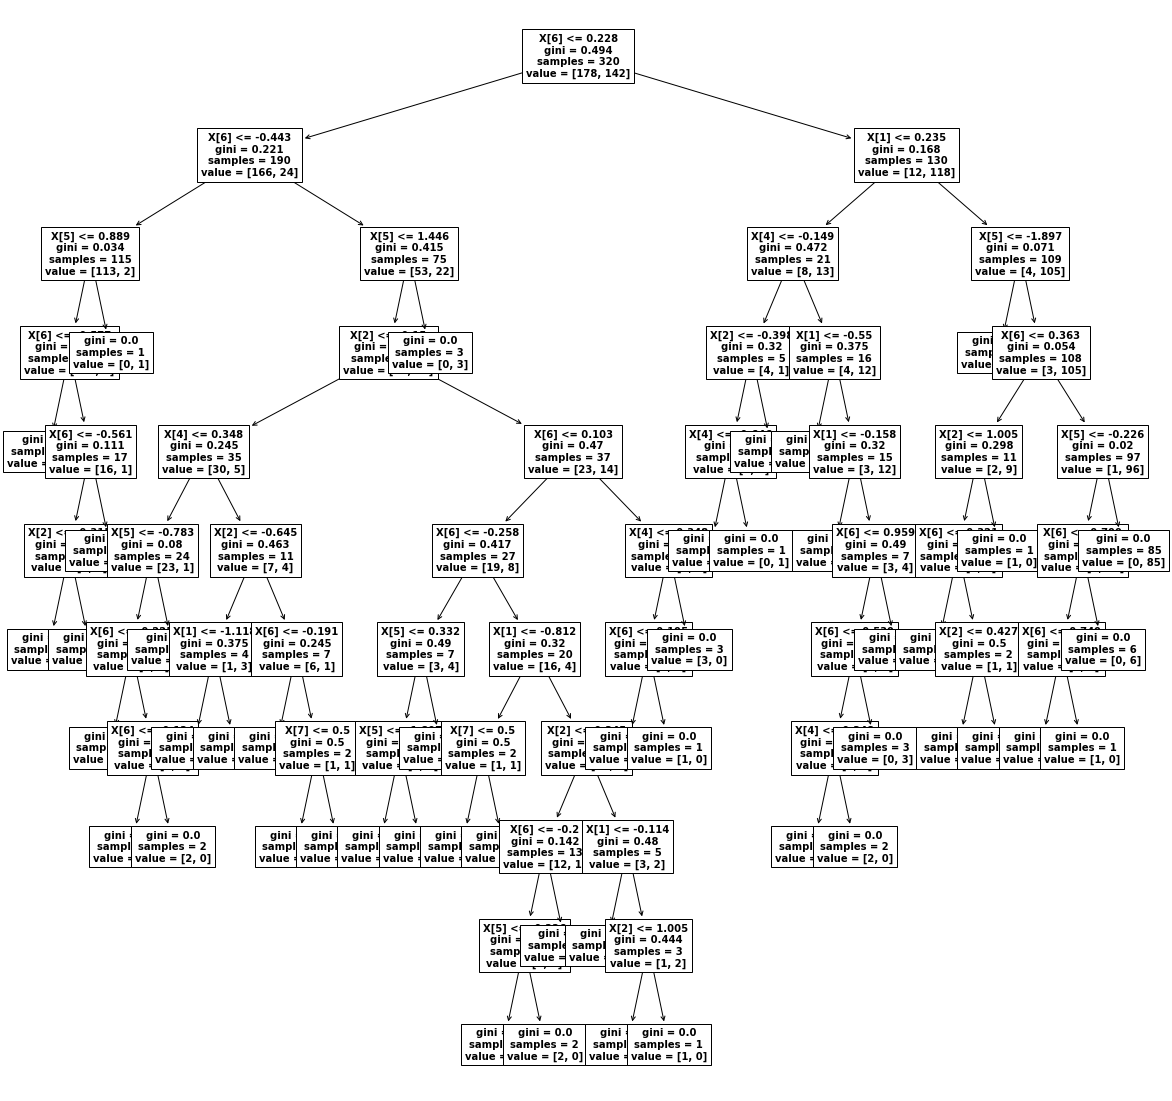

In [22]:
plt.figure(figsize=(20, 20))
tree.plot_tree(model_dt, fontsize=10)
plt.show()

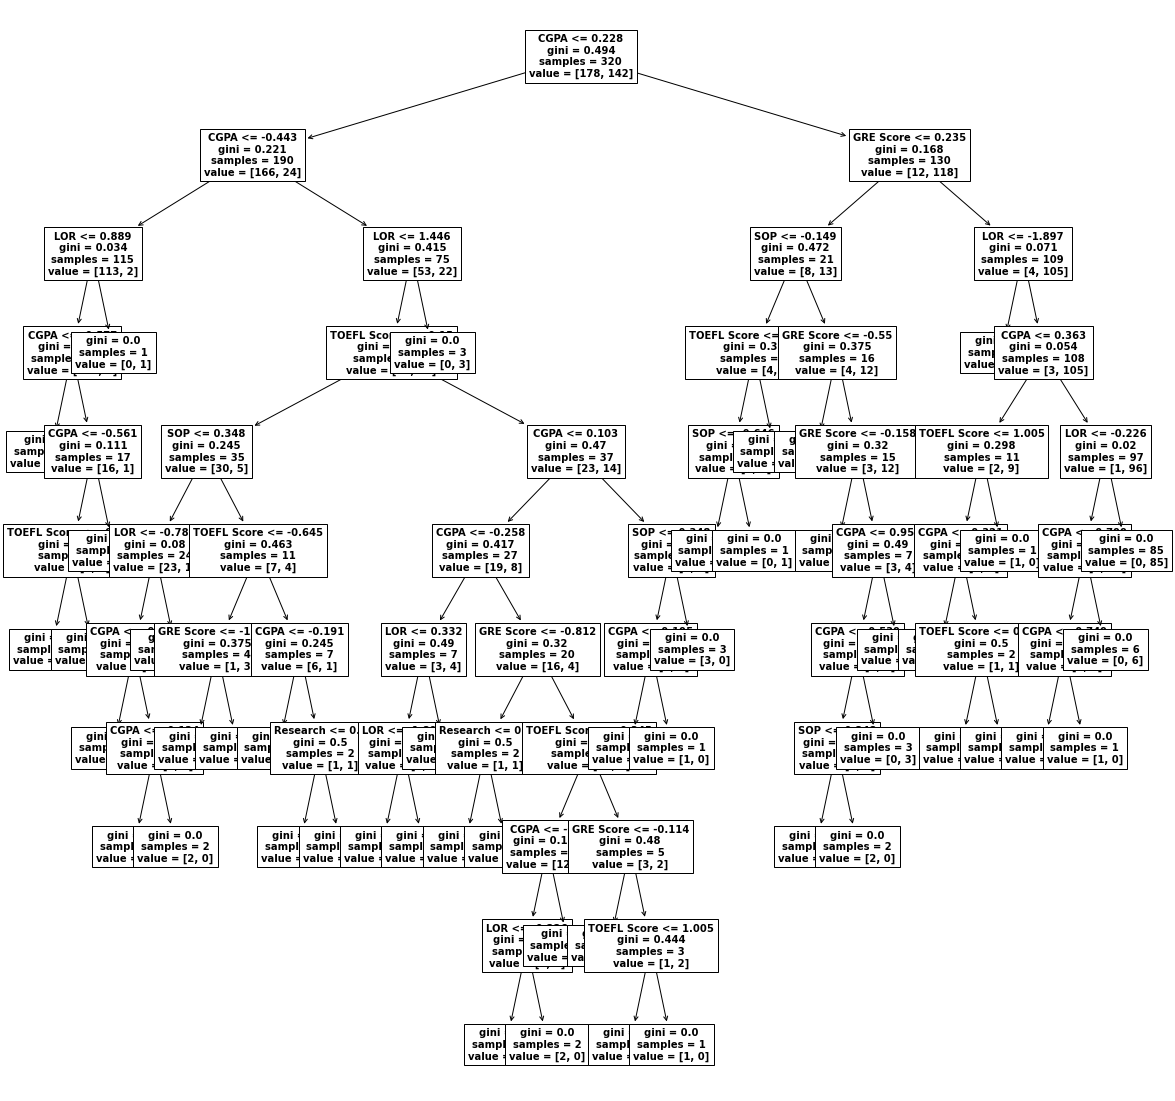

In [23]:
plt.figure(figsize=(20, 20))
tree.plot_tree(model_dt, feature_names=X_train.columns, fontsize=10)
plt.show()

In [24]:
import pydotplus
from IPython.display import Image

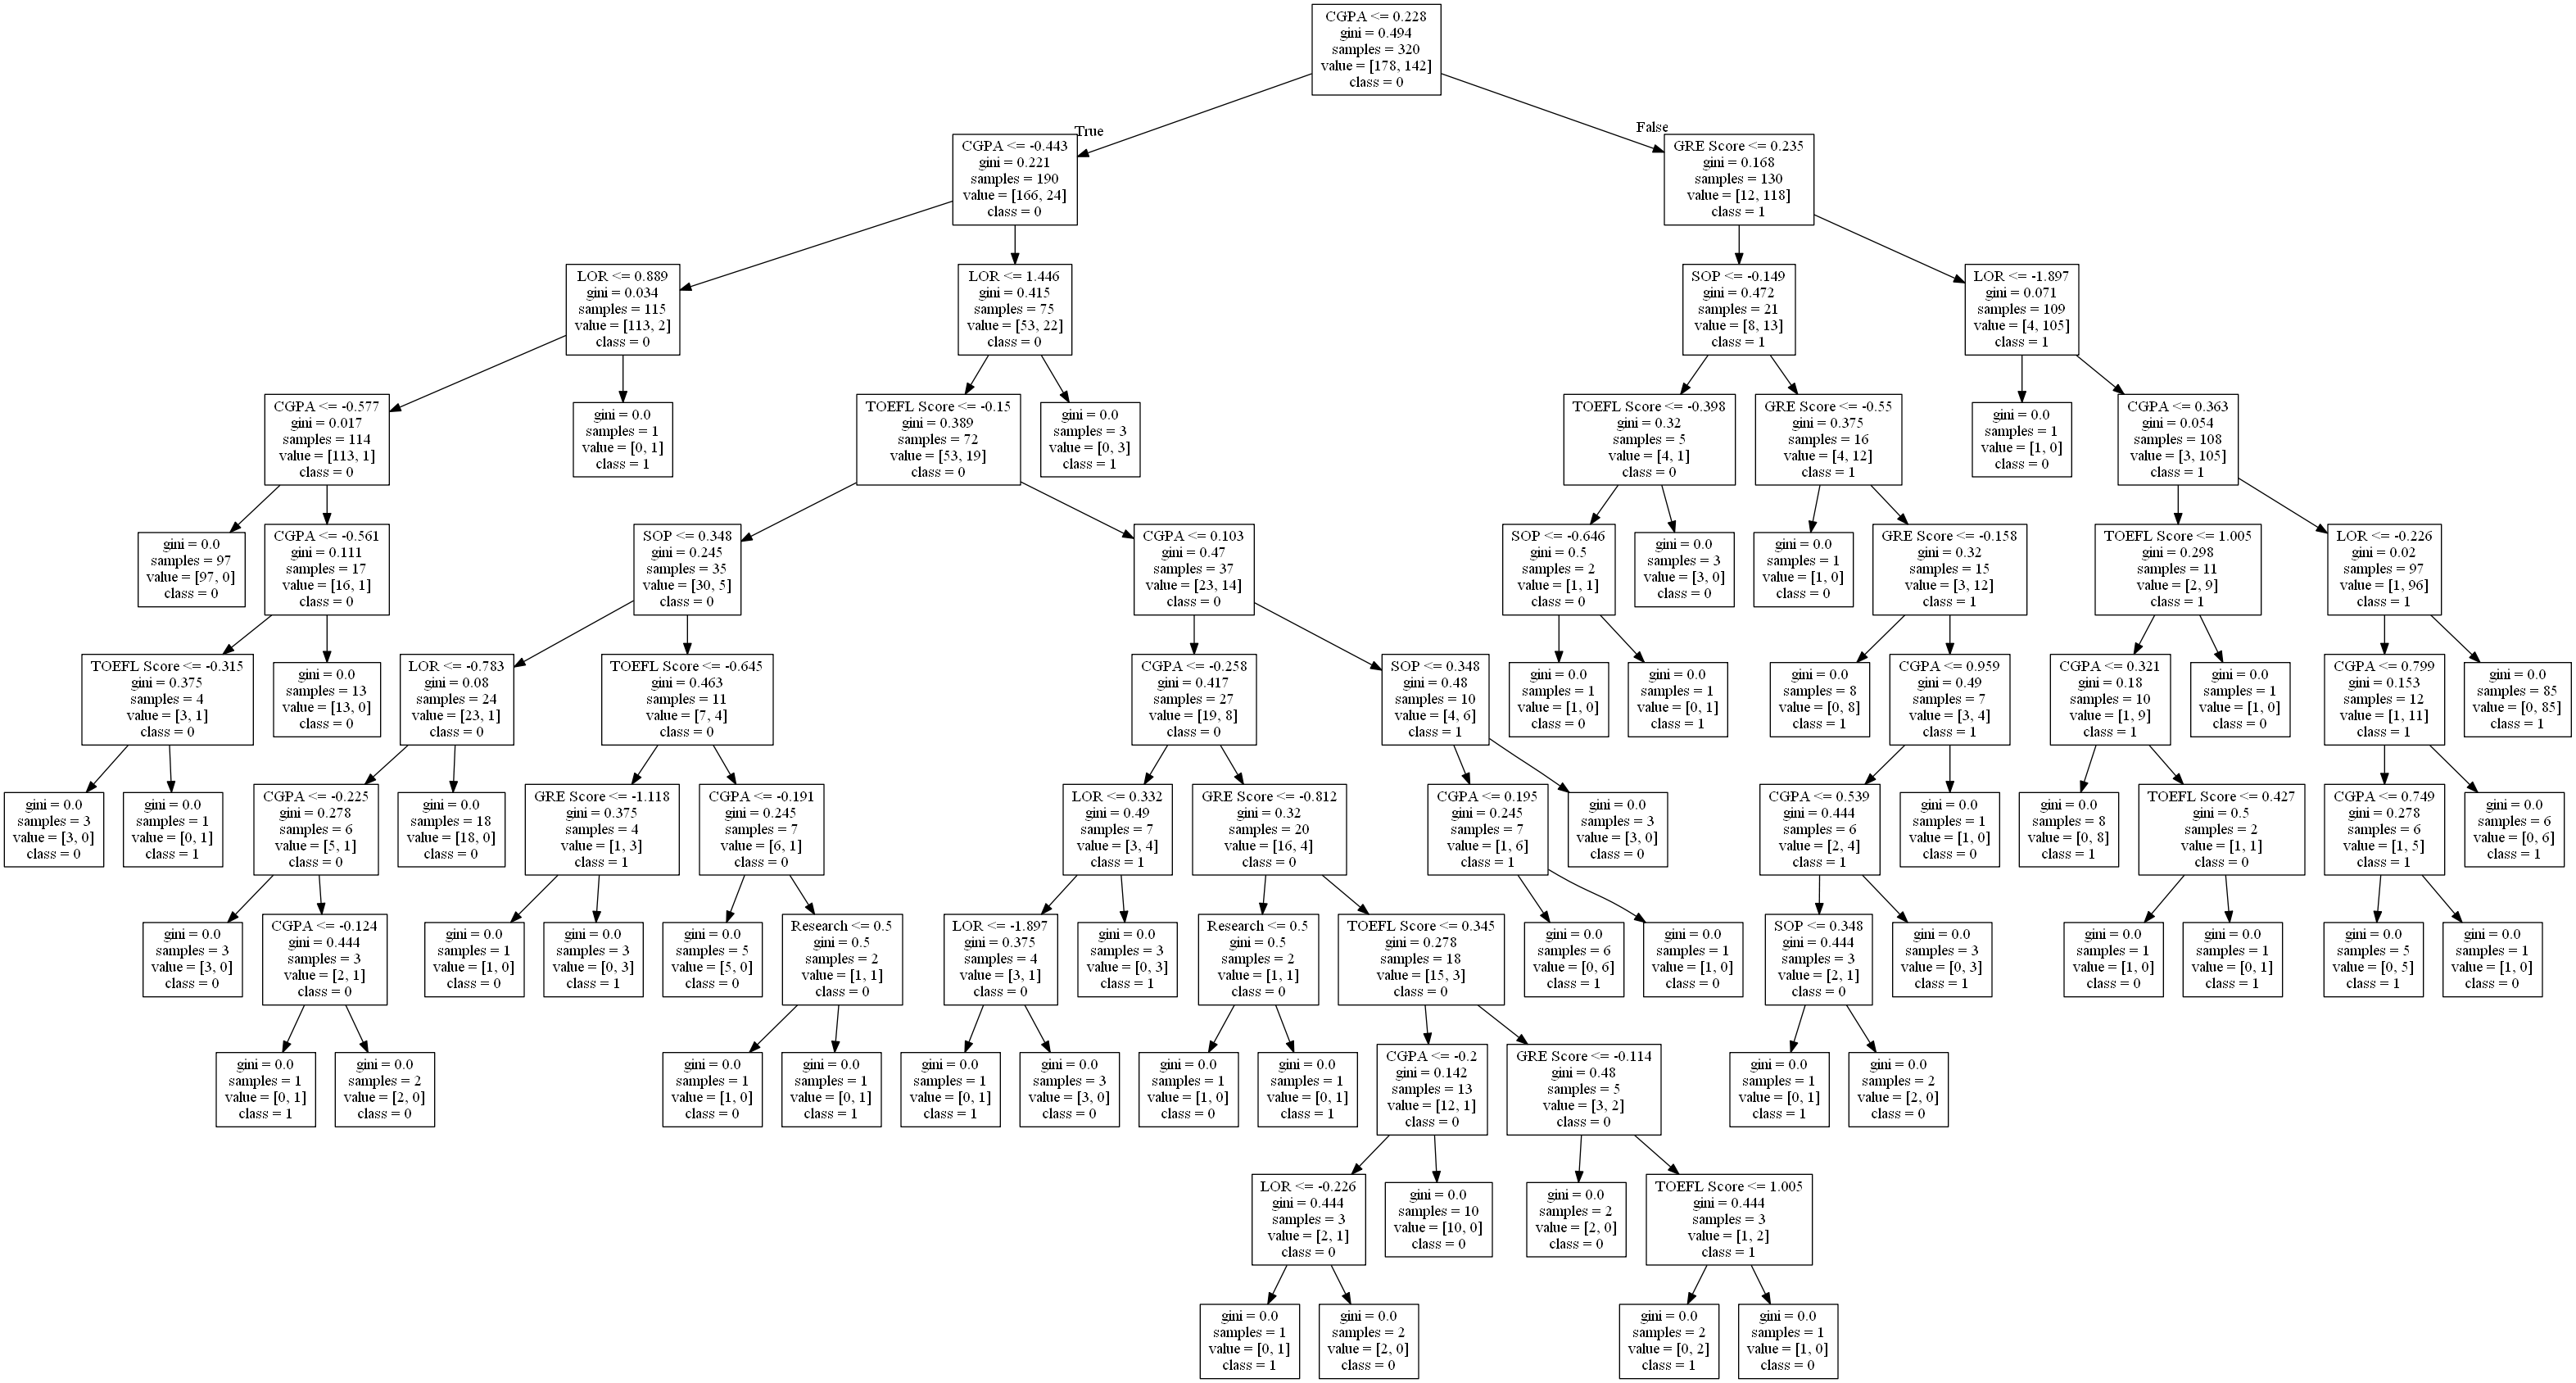

In [25]:
dot_data = tree.export_graphviz(decision_tree=model_dt,
                    feature_names=X_test.columns, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

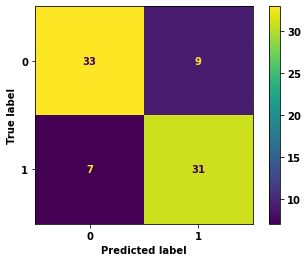

In [27]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_test,
                                                        y_pred=y_pred),
                      display_labels=model_dt.classes_).plot()

In [28]:
from sklearn.metrics import classification_report

In [29]:
print( classification_report(y_true=y_test, y_pred=y_pred))


              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.78      0.82      0.79        38

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



### Checking the model performance

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
score = cross_val_score(estimator=model_dt, 
                       X=df_iv_scaled_const,
                       y=df_dv, cv=5, scoring='f1')
score

array([0.80487805, 0.74358974, 0.86486486, 0.76056338, 0.82352941])

In [32]:
print("Bias Error: ", 1 - np.mean(score))
print("Variance Error: ", np.std(score)/np.mean(score))

Bias Error:  0.2005149101437016
Variance Error:  0.05458131977297551


In [ ]:
cross